# 21BAI1133

Q. Suppose you have been appointed as a data analyst in a biological research institute. You have been assigned a task of predicting the variety of seeds. The features are collected using scanned images of the seeds. You can use various features of the scanned image of seeds such as area, perimeter, etc. (refer seed.csv).

A.    Implement a suitable machine learning model for predicting variety of the seed. Assume your model uses a linear hypothesis function. You are allowed to use Scikit library for building the machine learning mode. (20 marks)

B.     Not all the features will equally contribute for the seed variety prediction. So pick top two features (f1 and f2) such that their per-class standard deviation difference is more as compared to other features.  Per-class standard deviation of a feature f1 is computed as follows (20 marks)

·         Fetch all the values of feature f1 pertaining to target=v1; find standard deviation. Lets call this value as a.

·         Fetch all the values of feature f2 pertaining to target=v2; find standard deviation. Lets call this value as b.

·         Find abs(a-b)

·         Select top two features having max value for abs(a-b)

 

C.     Modify your model implementation in A part to include only two features f1 and f2 as defined in B, and test the model. Recompute the validation metrics for the modified model.  (10 marks)

# A

In [1]:
#WE WILL BE USING : Logistic Regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
data = pd.read_csv('seed.csv')

In [3]:
data.head()

,Area,Perimeter,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,Class
0,28395.0,610.291,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,V1
1,28734.0,638.018,29172.0,191.272751,0.783968,0.984986,0.887034,0.953861,V1
2,29380.0,624.110,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,V1
3,30008.0,645.884,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,V1
4,30140.0,620.134,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,V1


In [4]:
data.tail()

,Area,Perimeter,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,Class
13606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.isnull().sum()

Area             10262
Perimeter        10262
ConvexArea       10262
EquivDiameter    10262
Extent           10262
Solidity         10262
roundness        10262
Compactness      10262
Class            10262
dtype: int64

###### we conclude that there exists rows with null values

In [6]:
data.describe()

,Area,Perimeter,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness
count,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000
mean,51693.179755,853.372307,52410.399224,253.513184,0.762831,0.987372,0.887543,0.860588
std,16413.178607,169.673227,16828.627216,39.361511,0.031300,0.005056,0.080816,0.054375
min,28395.000000,610.291000,28715.000000,190.141097,0.639787,0.919246,0.593708,0.714494
25%,38284.000000,711.966000,38651.000000,220.782025,0.747659,0.984032,0.815674,0.811791
50%,44290.000000,769.972000,44681.000000,237.469534,0.769472,0.989121,0.926886,0.874592
75%,66437.000000,1016.789000,67735.000000,290.843971,0.784399,0.991308,0.955628,0.904017
max,115967.000000,1359.763000,118497.000000,384.257427,0.840577,0.994213,0.990685,0.987303


In [7]:
data.shape

(13611, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           3349 non-null   float64
 1   Perimeter      3349 non-null   float64
 2   ConvexArea     3349 non-null   float64
 3   EquivDiameter  3349 non-null   float64
 4   Extent         3349 non-null   float64
 5   Solidity       3349 non-null   float64
 6   roundness      3349 non-null   float64
 7   Compactness    3349 non-null   float64
 8   Class          3349 non-null   object 
dtypes: float64(8), object(1)
memory usage: 957.1+ KB


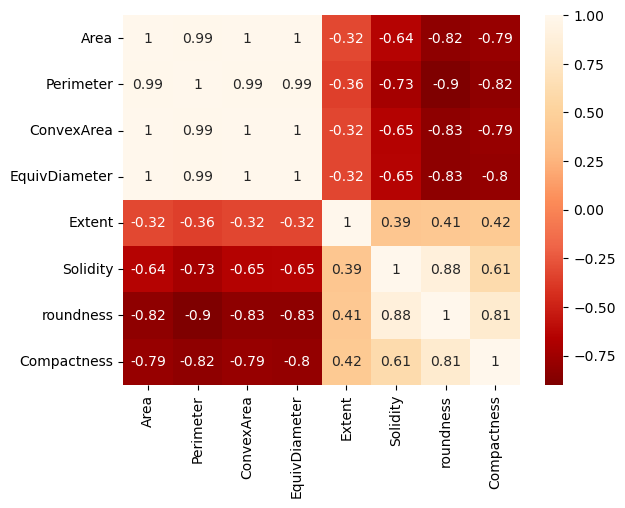

In [9]:
corre = data.corr()
dataplot = sns.heatmap(corre, cmap="OrRd_r", annot=True)

#### Preprocessing

In [10]:
#data.fillna(data.mean(), inplace=True)
###can use the above as more data is preferred to train a model by filling the data with average, 
###but the issue is that NaN would then be considered as a class by itself. So dropping is the best option.
data=data.dropna()       

In [11]:
data.isnull().sum()

Area             0
Perimeter        0
ConvexArea       0
EquivDiameter    0
Extent           0
Solidity         0
roundness        0
Compactness      0
Class            0
dtype: int64

In [12]:
data.shape

(3349, 9)

In [13]:
X = data.iloc[:,:-1]
y = data["Class"]

In [14]:
y

0       V1
1       V1
2       V1
3       V1
4       V1
        ..
3344    V2
3345    V2
3346    V2
3347    V2
3348    V2
Name: Class, Length: 3349, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

###### the "Class" column is of type "object" therefore encoding is necessary

In [17]:
y

array([0, 0, 0, ..., 1, 1, 1])

Training the model:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test)

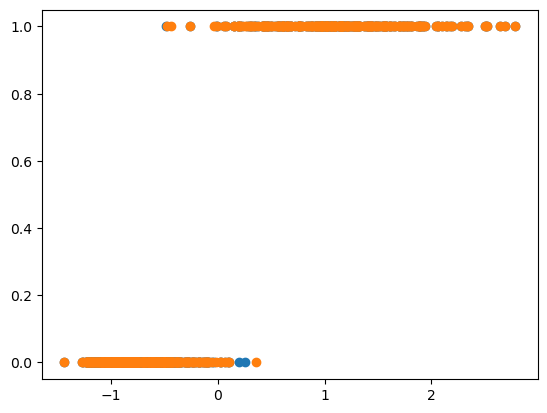

In [20]:
plt.scatter(X_test[:,0],y_test)
plt.scatter(X_test[:,0],y_pred)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9880597014925373

# B

In [22]:
import numpy as np
grouped_data = data.groupby('Class')
stdperclass = {}
for feature in X.columns:
    stdperclass[feature] = np.abs(grouped_data[feature].std().diff().max())
top_features = sorted(stdperclass.items(), key=lambda x: x[1], reverse=True)[:2]

f1, diff_f1 = top_features[0]
f2, diff_f2 = top_features[1]

print("Top Two Features with Max Per-Class Standard Deviation Difference are:")
print(f"F1: {f1}, Difference: {diff_f1}")
print(f"F2: {f2}, Difference: {diff_f2}")


Top Two Features with Max Per-Class Standard Deviation Difference are:
F1: ConvexArea, Difference: 5621.387461383627
F2: Area, Difference: 5485.509058730779


# C

In [29]:
X_modified = data[[f1, f2]]
X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(X_modified, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_mod = scaler.fit_transform(X_train_mod)
X_test_mod = scaler.transform(X_test_mod)

In [30]:
model_modified = LogisticRegression()
model_modified.fit(X_train_mod, y_train_mod)

LogisticRegression()

In [31]:
y_pred_mod = model_modified.predict(X_test_mod)

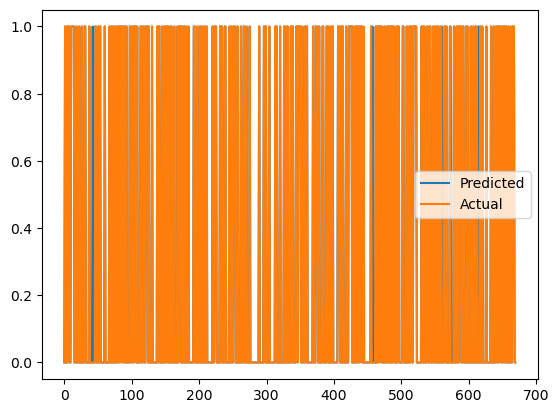

In [32]:
plt.plot(y_pred_mod, label='Predicted')
plt.plot(y_test_mod, label='Actual')
plt.legend()
plt.show()

In [33]:
accuracy_mod = accuracy_score(y_test_mod, y_pred_mod)
classification_report_str_mod = classification_report(y_test_mod, y_pred_mod)

In [34]:
print(f"Modified Model's Accuracy: {accuracy_mod}")
print("Modified Model's Classification Report:")
print(classification_report_str_mod)

Modified Model's Accuracy: 0.9850746268656716
Modified Model's Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       433
           1       0.97      0.99      0.98       237

    accuracy                           0.99       670
   macro avg       0.98      0.99      0.98       670
weighted avg       0.99      0.99      0.99       670



# On dropping all rows with null values, 
Accuracy in part A ==>98.8% ,
Accuracy in part C ==> 98.57%

# On filling all rows having null values with average,
Accuracy in part A ==> 99.11% ,
Accuracy in part C==> 93.6%